# **Popurarity Based Recommendation System**

In [1]:
import numpy as np
import pandas as pd
import pickle


In [2]:
movie_names = pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


# **Criteria** For Popularity Based Recommendation Systems

The criteria is based on:
1. Movies with the highest rating
2. Number of views

### Average ratings of movies

In [5]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [6]:
average_rating = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)
average_rating.head()

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Name: rating, dtype: float64

### Ratings count

In [7]:
rating_count = movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
rating_count.head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

#### Let's add the average rating count to our table

In [8]:
recommender_movie_data = movie_data[['title','rating']]
recommender_movie_data

,title,rating
0,Dangerous Minds (1995),2.5
1,Dangerous Minds (1995),3.0
2,Dangerous Minds (1995),4.0
3,Dangerous Minds (1995),4.0
4,Dangerous Minds (1995),3.0
...,...,...
99999,War of the Worlds (2005),2.5
100000,"Box, The (2009)",3.5
100001,Pie in the Sky (1996),3.0
100002,Summer Catch (2001),1.0


#### Calculate the average ratings

In [9]:
ratings_mean_count = pd.DataFrame(recommender_movie_data.groupby('title')['rating'].mean())
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


#### Calculate the **count** of the ratings and add to the **average ratings** above

In [10]:
ratings_mean_count['rating_counts'] = pd.DataFrame(recommender_movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [11]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2


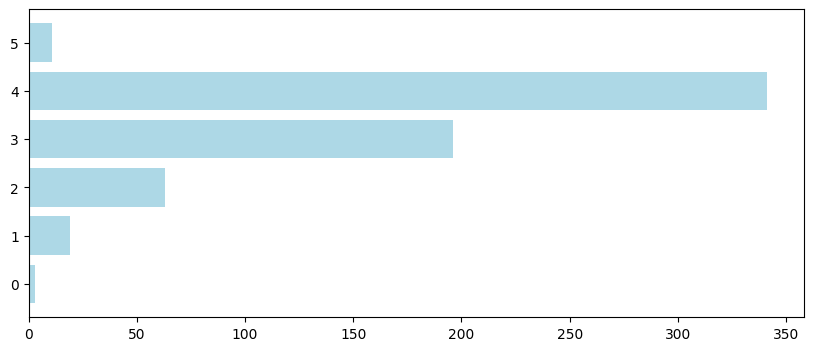

In [12]:
#plot rounded-up ratings with number of movies
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 4))
plt.barh(ratings_mean_count['rating'].round(),ratings_mean_count['rating_counts'],color='lightblue')
plt.show()

We can see that majority of the ratings are around 4 and 3.

In [13]:
ratings_mean_count = ratings_mean_count[(ratings_mean_count['rating'] > 3) & (ratings_mean_count['rating_counts'] > 100)]
ratings_mean_count

,rating,rating_counts
title,,
2001: A Space Odyssey (1968),3.9,123
Airplane! (1980),3.8,106
Aladdin (1992),3.7,215
Alien (1979),4.0,127
Aliens (1986),3.9,125
...,...,...
While You Were Sleeping (1995),3.4,101
Who Framed Roger Rabbit? (1988),3.7,108
Willy Wonka & the Chocolate Factory (1971),3.8,148


In [14]:
ratings_mean_count = ratings_mean_count.sort_values(by= 'rating',ascending=False).head(10)
ratings_mean_count

,rating,rating_counts
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118


In [15]:
def recommend_top_movies(n):
    """
    Recommend the top 'n' movies based on average ratings and rating counts.

    Returns:
    DataFrame: Top 'n' movies with their ratings and rating counts.
    """
    # Ensure data is sorted by both rating and rating counts
    sorted_movies = ratings_mean_count.sort_values(by=['rating', 'rating_counts'], ascending=False)
    return sorted_movies.head(n)

In [16]:
# Example usage
top_movies = recommend_top_movies(10)
top_movies


,rating,rating_counts
title,,
"Shawshank Redemption, The (1994)",4.5,311
"Godfather, The (1972)",4.5,200
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Schindler's List (1993),4.3,244
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
"Lord of the Rings: The Fellowship of the Ring, The (2001)",4.2,200


In [18]:
# Save the filtered and sorted dataframe

pickle.dump(ratings_mean_count, open('artifacts/popularity_based_movies.pkl', 'wb'))

### Load and Use the Saved Model

In [19]:
# Load the popularity-based recommender data
loaded_data = pickle.load(open('artifacts/popularity_based_movies.pkl', 'rb'))

In [20]:
# Define a function to recommend movies from the loaded data
def recommend_from_saved_data(data, n):
    """
    Recommend the top 'n' movies from the saved data.

    Returns:
    DataFrame: Top 'n' movies with their ratings and rating counts.
    """
    sorted_data = data.sort_values(by=['rating', 'rating_counts'], ascending=False)
    return sorted_data.head(n)

In [21]:
# Example usage
top_movies_from_saved = recommend_from_saved_data(loaded_data, 10)
top_movies_from_saved

,rating,rating_counts
title,,
"Shawshank Redemption, The (1994)",4.5,311
"Godfather, The (1972)",4.5,200
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Schindler's List (1993),4.3,244
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
"Lord of the Rings: The Fellowship of the Ring, The (2001)",4.2,200
